<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Feature_Importance_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
#df = df[df['n/m']!=2]

print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

8750


In [2]:
X_modified = X
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

   subtype  class  indeks    n   m   n/m  (n/m)^2   (n/m)^3       m/n  \
0        9      2       6  126  28   4.5    20.25    91.125  0.222222   
1       13      1       2  180  18  10.0   100.00  1000.000  0.100000   
2        8      5      10   20   5   4.0    16.00    64.000  0.250000   
3       12      6       1   54   6   9.0    81.00   729.000  0.111111   
4       14      4       8  110  10  11.0   121.00  1331.000  0.090909   

    (m/n)^2   (m/n)^3   av.length    std.dev  median  range  min  max   k  
0  0.049383  0.010974   61.674603  22.464844    62.0     80   20  100  68  
1  0.010000  0.001000   53.244446  29.811255    52.0     99    1  100  84  
2  0.062500  0.015625   97.099998  42.628010    91.5    159   30  189  19  
3  0.012346  0.001372  129.814819  41.052696   128.5    157   54  211  49  
4  0.008264  0.000751   98.199997  19.473246   100.0     84   56  140  65  


In [3]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=0)
#oversample.fit(X_modified, y_encoded)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded


y_new = []
for val in y_encoded:
  if(val[0]==1):
    y_new.append(0)
  elif(val[1]==1):
    y_new.append(1)
  elif(val[2]==1):
    y_new.append(2)
  else:
    y_new.append(3)


[0.07796993 0.08734799 0.         1.         0.68687652 0.15391118
 0.0486796  0.09920419 0.02445918 0.04798957 0.02312522 0.04056944
 0.14984647 0.01918003 0.08622572 0.01598426 0.06469815 0.02639218]


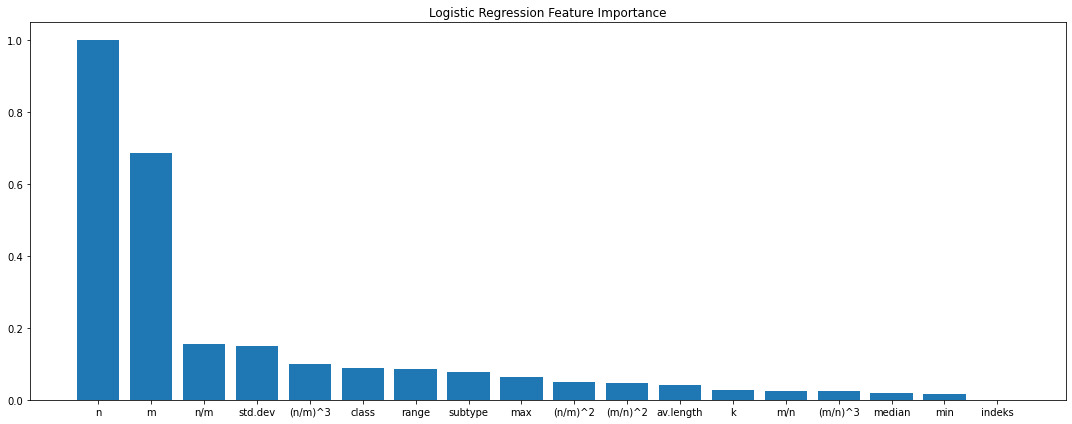

In [4]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

X_copy = X_modified
X_modified = sc.fit_transform(X_modified)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_modified, y_new)

importances = model.coef_[0]
importances = abs(importances)

importances = (importances-np.min(importances))/np.ptp(importances)

sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_copy.columns[1:]

print(importances)

plt.figure(figsize=(15, 6))
plt.title('Logistic Regression Feature Importance')
plt.bar(range(X_copy.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_copy.shape[1]), X_copy.columns[sorted_indices])
plt.tight_layout()
plt.show()
